# Introduction to Data Preprocessing

In the realm of data science and machine learning, data preprocessing is the crucial process of transforming raw data into a format that is suitable for analysis and model building. It's often considered the most time-consuming yet essential step in the data science workflow.

**Why is Data Preprocessing Important?**

Raw data is often messy, incomplete, and inconsistent. Without proper preprocessing, it can lead to inaccurate insights, biased models, and ultimately, flawed decisions. Data preprocessing aims to address these issues by:

* **Improving Data Quality:** Cleaning and validating data to ensure accuracy and consistency.
* **Enhancing Model Performance:** Transforming data into a format that algorithms can effectively utilize.
* **Reducing Bias and Errors:** Removing or mitigating potential sources of bias in the data.
* **Enabling Meaningful and Faster Analysis:** Preparing data in a way that facilitates insightful exploration and visualization.

**Key Steps in Data Preprocessing:**

Data preprocessing typically involves a series of steps, including:

1. **Data Collection:** Gathering data from various sources.
2. **Data Cleaning:** Handling missing values, outliers, and inconsistencies.
3. **Data Transformation:** Converting data into a suitable format, such as scaling or encoding.
4. **Data Reduction:** Selecting relevant features and reducing dimensionality.
5. **Data Integration:** Combining data from multiple sources.
6. **Data Validation:** Ensuring data accuracy and consistency after preprocessing.

**In essence, data preprocessing is the foundation upon which successful data science projects are built. By ensuring your data is clean, consistent, and appropriately formatted, you pave the way for meaningful insights and impactful decisions.**

## Garbage In, Garbage Out in Data Preprocessing

The principle of "Garbage In, Garbage Out" (GIGO) is fundamental in data science and especially relevant during data preprocessing. It highlights the critical fact that the quality of your output (insights, models, predictions) is directly dependent on the quality of your input data.

Here's how GIGO applies to data preprocessing:

* **Faulty Data Leads to Faulty Results:** If your data is incomplete, inaccurate, inconsistent, or contains errors, any analysis or model built using this data will likely be flawed. The results you obtain will be unreliable and potentially misleading.
* **Data Preprocessing is Key:** The data preprocessing stage is crucial for mitigating GIGO. By carefully cleaning, transforming, and validating your data, you ensure that the data you feed into your models is as accurate and reliable as possible.
* **Consequences of Ignoring GIGO:** Ignoring GIGO can lead to incorrect insights, biased models, and ultimately, poor decision-making. In real-world scenarios, this can have serious consequences, especially in critical domains like healthcare, finance, or engineering.
* **Examples:**
    * A model trained on biased data will produce biased predictions.
    * Inaccurate data can lead to incorrect market analysis and flawed business strategies.
    * A medical diagnosis system trained on incomplete patient data could result in misdiagnosis.

**Mitigating GIGO:**

* **Thorough Data Cleaning:** Address missing values, outliers, and inconsistencies in your data.
* **Data Validation:** Implement checks to ensure data accuracy and consistency.
* **Careful Feature Engineering:** Select relevant features and transform them appropriately.
* **Data Governance:** Establish processes for data quality management and control.

By prioritizing data quality during preprocessing and embracing the principle of GIGO, you can increase the reliability and trustworthiness of your data science work.

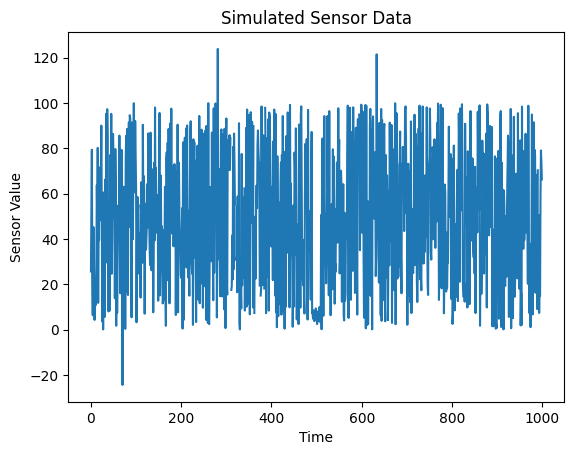

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_sensor_data(num_points=1000, min_val=0, max_val=100, missing_pct=0.01, noisy_pct=0.01, faulty_pct=0.02):
  """Simulates sensor data with missing, noisy, and faulty values.

  Args:
    num_points: The number of data points to generate.
    min_val: The minimum sensor value.
    max_val: The maximum sensor value.
    missing_pct: Percentage of missing values.
    noisy_pct: Percentage of noisy values.
    faulty_pct: Percentage of faulty values.

  Returns:
    A NumPy array representing the simulated sensor data.
  """

  # Generate random data within the specified range
  data = np.random.uniform(min_val, max_val, num_points)

  # Introduce missing values
  missing_indices = np.random.choice(num_points, int(num_points * missing_pct), replace=False)
  data[missing_indices] = np.nan  # Use NaN to represent missing values

  # Introduce noisy values
  noisy_indices = np.random.choice(num_points, int(num_points * noisy_pct), replace=False)
  data[noisy_indices] = np.random.uniform(min_val - 50, max_val + 50, len(noisy_indices)) # Noisy values outside the normal range

  # Introduce faulty values
  faulty_start = int(num_points * (1 - faulty_pct) / 2)
  faulty_end = int(num_points * (1 + faulty_pct) / 2)
  data[faulty_start:faulty_end] = np.random.uniform(min_val, (max_val-min_val)/10 , faulty_end-faulty_start) # faulty period with low values



  return data

# Generate and plot the simulated data
simulated_data = simulate_sensor_data()
plt.plot(simulated_data)
plt.title('Simulated Sensor Data')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.show()

## Data Collection

Data collection is the fundamental process of gathering raw data from various sources. It's the starting point for any data science endeavor, and its quality significantly impacts the subsequent stages of preprocessing, analysis, and model building.

In our simulated scenario, we utilized the `simulate_sensor_data` function to generate a synthetic dataset representing sensor readings over time. Let's delve deeper into the key aspects of this simulated data collection process.

### Understanding the Data Source

Our data source is a simulated sensor that ostensibly measures some physical quantity, represented by numerical values. While the exact nature of the sensor or the measured quantity isn't specified, it's sufficient to understand that the data points reflect readings taken at regular intervals.

### Characteristics of the Simulated Data

The `simulate_sensor_data` function introduces intentional imperfections to mimic real-world data collection challenges:

* **Range:** The sensor values are designed to fall within a specific range (0-100 in our case). This range represents the sensor's operational limits or the expected values for the measured quantity.
* **Missing Values:** Represented by `np.nan`, indicating instances where the sensor failed to record a reading. This could be due to sensor malfunctions, power outages, or communication errors.
* **Noisy Values:** Values that deviate significantly from the expected range, representing sensor noise or external disturbances. These noisy readings can skew analysis and reduce the accuracy of models.
* **Faulty Period:** A continuous period where the sensor readings are consistently low, indicating a persistent malfunction or calibration issue. Identifying and addressing this faulty period is crucial for data integrity.

### Importance of Data Collection in Context

While our data is simulated, the challenges it presents are analogous to those encountered in real-world data collection scenarios. Whether dealing with sensor data, financial data, or social media data, understanding the data source and its potential imperfections is essential for effective preprocessing.

By acknowledging these challenges during data collection, we can make informed decisions about data cleaning, transformation, and feature engineering, ultimately leading to more reliable and insightful data analysis.

**In summary,** data collection is more than just gathering numbers; it's about understanding the context, the source, and the potential pitfalls that can affect data quality. In our simulated scenario, the `simulate_sensor_data` function provides a controlled environment to explore these challenges and prepare for real-world data preprocessing tasks.

In [ ]:
# Essentially, our data collection is:
simulated_data = simulate_sensor_data()

## Data Cleaning

Data cleaning is the process of identifying and correcting errors, inconsistencies, and missing values in your dataset. It's crucial for ensuring data quality and reliable analysis results. In our simulated sensor data, we have three main issues to address:

1. **Missing Values:** Represented by `np.nan`.
2. **Noisy Values:** Values outside the expected range (0-100).
3. **Faulty Period:** A continuous period of consistently low values.

### Handling Missing Values

* **Imputation:** Replacing missing values with estimated values. Common methods include:
    * **Mean/Median Imputation:** Replacing with the mean or median of non-missing values. This can be represented mathematically as: <br>
        $x_{missing}$ =
        
        \begin{cases}
        \bar{x} & \text{for mean imputation} \\
        median(x) & \text{for median imputation}
        \end{cases}
        
        where $x_{missing}$ is the missing value, $\bar{x}$ is the mean, and $median(x)$ is the median of the non-missing values.
        
    * **Forward/Backward Fill:** Using the previous or next valid value to fill the gap.
    * **Linear Interpolation:** Estimating missing values based on surrounding data points.

* **Removal:** Deleting rows or columns with missing values. This can be drastic and might lead to information loss.

### Handling Noisy Values

* **Outlier Detection:** Identifying and handling values significantly deviating from the expected range. Techniques include:
    * **Z-score:** Measuring how many standard deviations a data point is from the mean.
        $z = \frac{x - \bar{x}}{s}$

        where $z$ is the z-score, $x$ is the data point, $\bar{x}$ is the mean, and $s$ is the standard deviation.
    * **IQR (Interquartile Range):** Identifying values outside a range defined by quartiles.
    * **Visual Inspection:** Using box plots or scatter plots to identify outliers.

* **Smoothing:** Applying techniques like moving averages to reduce the impact of noise.

### Handling the Faulty Period

* **Segmentation:** Identifying and isolating the faulty period. This might involve analyzing the time series for abrupt changes in values.
* **Correction/Removal:** Depending on the severity and duration of the faulty period, you might choose to correct the values (if possible) or remove the affected data points.

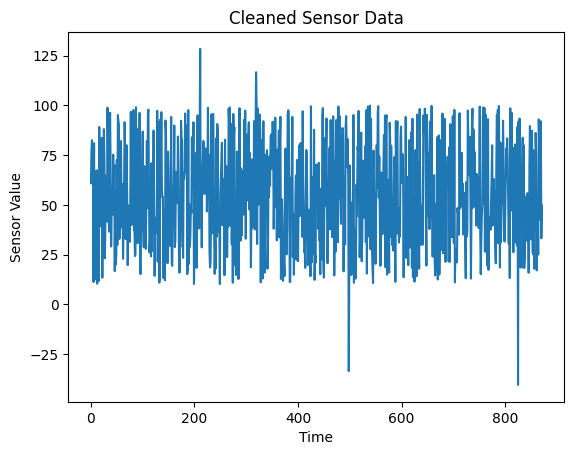

In [ ]:
import numpy as np

# ... (simulate_sensor_data function from previous response) ...

simulated_data = simulate_sensor_data()

# Handling Missing Values (Mean Imputation)
mean_value = np.nanmean(simulated_data)  # Calculate mean ignoring NaNs
simulated_data[np.isnan(simulated_data)] = mean_value

# Handling Noisy Values (Outlier Removal using Z-score)
from scipy import stats
z_scores = np.abs(stats.zscore(simulated_data))
simulated_data = simulated_data[(z_scores < 3)]  # Remove values with z-score > 3

# Handling Faulty Period (Removal)
# (Assuming you've identified the faulty period indices)
faulty_indices = np.where((simulated_data < 10) & (simulated_data > 0))
simulated_data = np.delete(simulated_data, faulty_indices)
# Plot cleaned data
plt.plot(simulated_data)
plt.title('Cleaned Sensor Data')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.show()

## Outliers

Even after our initial cleaning steps, some outliers might persist due to the assumptions and limitations of the Z-score method. Here's a deeper dive:

### Why Outliers Might Remain

1. **Non-Normal Distribution:** The Z-score method assumes a normal (Gaussian) distribution of data. If your data deviates significantly from this assumption, the Z-score might not accurately identify all outliers.
2. **Threshold Sensitivity:** The chosen threshold of 3 standard deviations might be too lenient or strict depending on your specific dataset. Some outliers could fall within this range, while some valid data points might be incorrectly flagged as outliers.
3. **Faulty Period Removal:** Removing the faulty period can alter the data distribution, potentially introducing new outliers or shifting the boundaries for what constitutes an outlier.

### Addressing Remaining Outliers

Here are some approaches to tackle the remaining outliers:

1. **Threshold Adjustment:** Experiment with different Z-score thresholds. You could try a stricter threshold (e.g., 2.5 standard deviations) to capture more outliers or a more lenient one (e.g., 3.5 standard deviations) if you're concerned about removing valid data points.
2. **Alternative Methods:** Explore other outlier detection techniques:
    * **IQR Method:** The Interquartile Range (IQR) method is less sensitive to extreme values and can be more robust for non-normal distributions. It identifies outliers as values falling outside a range defined by quartiles.
    * **Visual Inspection:** Box plots and scatter plots can help you visually identify potential outliers based on their distance from the bulk of the data.
3. **Data Transformation:** Certain transformations, such as scaling or normalization, can help reduce the impact of outliers on your analysis by bringing values to a similar scale.

**Applying the IQR Method**

Below is the Python code for applying the IQR method:

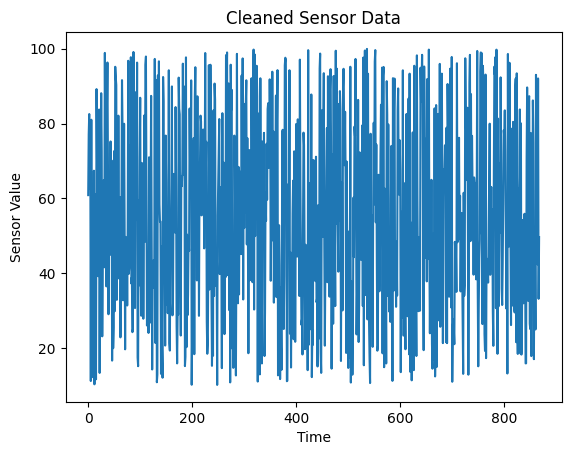

In [ ]:
# Calculate the IQR
Q1 = np.quantile(simulated_data, 0.25)
Q3 = np.quantile(simulated_data, 0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Remove outliers
simulated_data = simulated_data[(simulated_data >= lower_bound) & (simulated_data <= upper_bound)]
# Plot cleaned data
plt.plot(simulated_data)
plt.title('Cleaned Sensor Data')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.show()

Even after applying the IQR method, there might still be some outliers remaining, particularly those that fall outside the expected range (0-100 in our case). These outliers have persisted despite the previous cleaning steps. To address these range-based outliers, you can use a simple filtering approach to remove any values that are outside the desired range. Here's how you can do it:

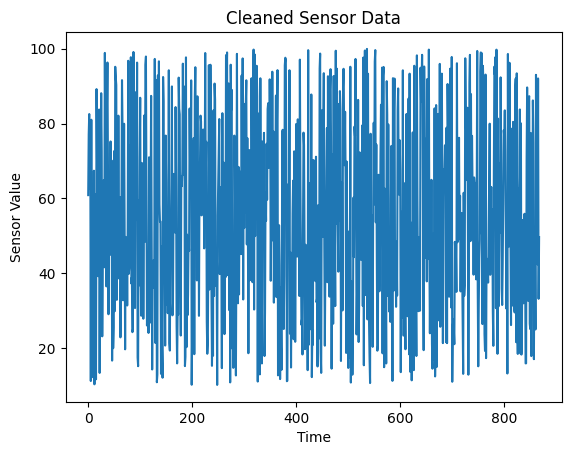

In [ ]:
# Remove outliers outside the range
simulated_data = simulated_data[(simulated_data >= 0) & (simulated_data <= 100)]

# Plot cleaned data
plt.plot(simulated_data)
plt.title('Cleaned Sensor Data')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.show()

## Moving Average

A moving average is a technique used to smooth out fluctuations in time series data. It calculates the average of a specified number of consecutive data points, creating a new series that represents the trend of the original data.




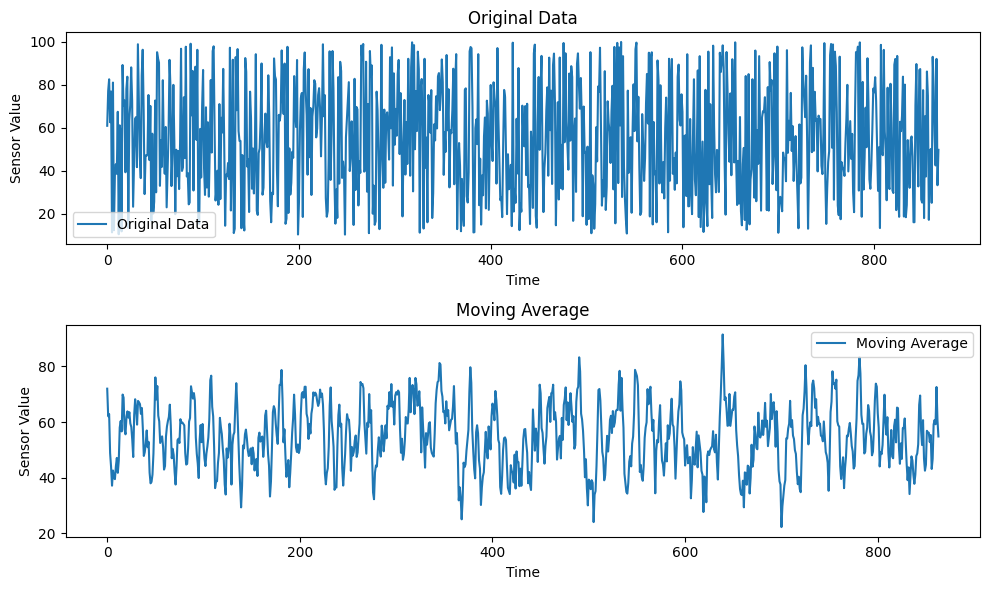

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ... (Existing simulate_sensor_data function and data cleaning steps) ...

window_size = 5  # Adjust the window size as needed
moving_avg_data = np.convolve(simulated_data, np.ones(window_size), 'valid') / window_size

# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 6))  # 2 rows, 1 column

# Plot the original data in the first subplot
axs[0].plot(simulated_data, label='Original Data')
axs[0].set_title('Original Data')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Sensor Value')
axs[0].legend()

# Plot the moving average data in the second subplot
axs[1].plot(moving_avg_data, label='Moving Average')
axs[1].set_title('Moving Average')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Sensor Value')
axs[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

1. np.convolve(simulated_data, np.ones(window_size), 'valid'):

Performs the core operation of calculating the moving average using the convolution function.

2. np.ones(window_size):

Creates an array of ones with length equal to window_size. This array acts as the kernel or window for the convolution. It essentially represents a uniform weighting for the data points within the window.

3. 'valid':

Mode of the convolution. It specifies that the output should only contain elements where the kernel completely overlaps with the input data. This avoids edge effects where the kernel would partially extend beyond the boundaries of the data.

4. Convolution Process:

The convolution operation slides the kernel (array of ones) along the input data, multiplying the corresponding elements and summing the results.
For each position of the kernel, this sum represents the weighted average of the data points within the window. The 'valid' mode ensures that only the central portions of the convolution are included in the output, where the kernel fully overlaps the data.<br>

5. window_size:

Divides the result of the convolution by the window_size.

6. Normalization:

This division is essential for normalizing the moving average. Since the kernel is an array of ones, the convolution output essentially represents the sum of the data points within the window. Dividing by the window_size calculates the average value within the window, giving you the moving average.

Example:
Let's say you have the following data and a window size of 3:

```python
simulated_data = [1, 2, 3, 4, 5]
window_size = 3
```

The convolution with a kernel of [1, 1, 1] (representing a uniform window of size 3) would produce:
```python
convolution_output = [6, 9, 12]  # (1+2+3, 2+3+4, 3+4+5)
```

Then, dividing by the window size (3) gives you the moving average:

```python  
moving_avg_data = [2, 3, 4]  # (6/3, 9/3, 12/3)
```

These values represent the moving averages centered around the data points.<br>
Using a Pandas DataFrame would make things simpler:
```python
import pandas as pd

# Assuming 'simulated_data' is in a DataFrame column named 'SensorValue'
df = pd.DataFrame({'SensorValue': simulated_data})
moving_avg_data = df['SensorValue'].rolling(window=window_size, center=True).mean()
```

In the Encoding topic we are going to use DataFrames.

## Data Transformation
Data transformation is crucial in preparing data for analysis and machine learning. It involves converting data from one format or structure to another to improve model performance and interpretability.<br>

1. **Scaling:** Transforming numerical features to a specific range, such as 0 to 1 or -1 to 1. This prevents features with larger values from dominating the model and improves algorithm performance. Common scaling methods include:
    * **Min-Max Scaling:**
$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$
    * **Standardization (Z-score Normalization):**  $x_{scaled} = \frac{x - \bar{x}}{s}$ where $\bar{x}$ is the mean and $s$ is the standard deviation.

2. **Normalization:** A type of scaling that transforms data to have a mean of 0 and a standard deviation of 1. This is beneficial for algorithms sensitive to the scale of the data.

3. **Encoding:** Converting categorical features into numerical representations. This is essential for machine learning algorithms that work with numerical data. Common encoding methods include:
    * **One-Hot Encoding:** Creates binary (0/1) columns for each category.
    * **Label Encoding:** Assigns a unique integer to each category.

4. **Data Type Conversion:** Changing data from one type to another (e.g., string to number).

5. **Aggregation:** Combining data from multiple rows or columns into a single value (e.g., calculating the average).

6. **Feature Engineering:** Creating new features from existing ones to enhance model performance.

### Choosing the Right Transformation

The appropriate transformation depends on the dataset and the machine learning algorithm. Consider the following:

* **Algorithm Requirements:** Some algorithms require specific data formats (e.g., scaled data for distance-based methods).
* **Data Characteristics:** The distribution and range of your data influence the choice of transformation.
* **Interpretability:** Some transformations affect the interpretability of features.

##Min-Max Scaling
Min-Max scaling is a data transformation technique that scales numerical features to a specific range, typically between 0 and 1. This is done by using the following formula:

$x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}$

where:

$x_{scaled}$ is the scaled value <br>
$x$ is the original value<br>
$x_{min}$ is the minimum value of the feature<br>
$x_{max}$ is the maximum value of the feature<br>
Here's the code to apply Min-Max scaling to our simulated sensor data:

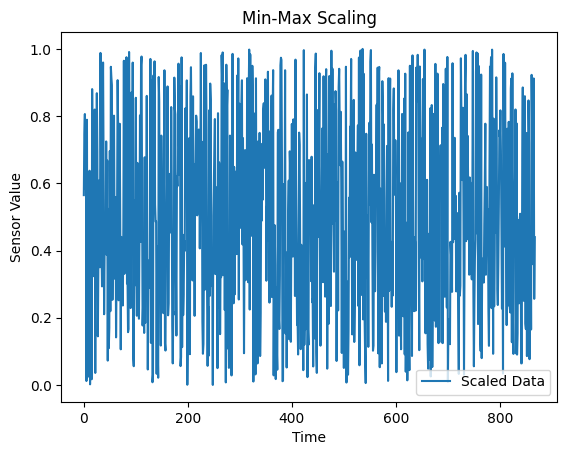

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'simulated_data' contains your cleaned data

# Make a copy of the original data to preserve it
scaled_data = simulated_data.copy()

# Apply Min-Max scaling
scaled_data = (scaled_data - np.min(scaled_data)) / (np.max(scaled_data) - np.min(scaled_data))

# Plot the original and scaled data
#plt.plot(simulated_data, label='Original Data')
plt.plot(scaled_data, label='Scaled Data')
plt.title('Min-Max Scaling')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.legend()
plt.show()

Standardization, also known as Z-score normalization, is a data transformation technique that transforms numerical features to have a mean of 0 and a standard deviation of 1. This is achieved by subtracting the mean of the feature from each data point and then dividing by the standard deviation.

### Formula:

$x_{scaled} = \frac{x - \bar{x}}{s}$

where:

*  $x_{scaled}$ is the scaled value
* $x$ is the original value
* $\bar{x}$ is the mean of the feature
* $s$ is the standard deviation of the feature

### Benefits of Standardization:

* **Algorithm Performance:** Many machine learning algorithms, especially those based on distance calculations (e.g., k-nearest neighbors, support vector machines), perform better with standardized data.
* **Feature Scaling:** Standardization ensures that all features have a similar range of values, preventing features with larger values from dominating the model training process.
* **Outlier Handling:** Standardization can help reduce the impact of outliers, as it brings them closer to the mean.

### When to Use Standardization:

* When the data distribution is not normal (Gaussian).
* When the algorithm is sensitive to the scale of the data.
* When dealing with outliers.

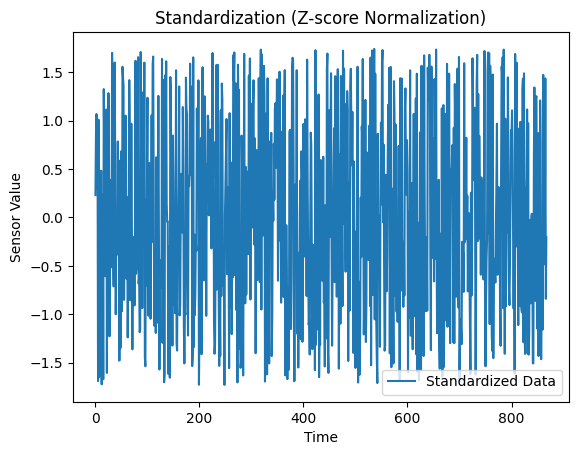

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'simulated_data' contains your cleaned data

# Make a copy of the original data to preserve it
standardized_data = simulated_data.copy()

# Apply standardization
standardized_data = (standardized_data - np.mean(standardized_data)) / np.std(standardized_data)

# Plot the original and standardized data
#plt.plot(simulated_data, label='Original Data')
plt.plot(standardized_data, label='Standardized Data')
plt.title('Standardization (Z-score Normalization)')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.legend()
plt.show()

In machine learning, many algorithms require numerical input data. However, real-world datasets often contain categorical features, which are variables that can take on one of a limited, and usually fixed, number of possible values. Examples include color (red, green, blue), land cover type (bare soil, water body, developed area), or temperature level (very low, low, moderate, high, very high).

Encoding is the crucial process of converting these categorical features into numerical representations that machine learning models can understand and work with. This transformation allows algorithms to effectively learn patterns and relationships within the data.

### Example: Encoding Land Cover Class

Now, let's consider a practical example using land cover classes to illustrate encoding techniques. Suppose we have a dataset with a categorical feature representing land cover types: "bare soil," "water body," and "developed area."

We'll explore two common encoding methods:

1. **One-Hot Encoding**

One-hot encoding creates new binary (0/1) columns for each land cover class. This avoids introducing artificial ordinal relationships between the categories.

2. **Label Encoding**

Label encoding assigns a unique integer to each land cover class. This might be suitable if there's a clear ordinal relationship between the categories (e.g., if there's a progression from "bare soil" to "developed area"), but it could mislead the model if there's no true ordinality.

In [ ]:
import numpy as np
import pandas as pd

# Define land cover classes
land_cover_classes = ['bare soil', 'water body', 'developed area']

# Generate a simulated sequence of 10 random land cover classes
land_cover_sequence = np.random.choice(land_cover_classes, size=10)

# Create a pandas DataFrame
land_cover_df = pd.DataFrame({'Land Cover': land_cover_sequence})

# One-Hot Encoding using pandas get_dummies
encoded_land_cover_onehot = pd.get_dummies(land_cover_df, columns=['Land Cover'], prefix=['Land_Cover'])

# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
land_cover_df['Land_Cover_Encoded'] = label_encoder.fit_transform(land_cover_df['Land Cover'])
encoded_land_cover_label = land_cover_df[['Land_Cover_Encoded']]

print("Original Data:")
print(land_cover_df)
print("\nOne-Hot Encoded Data:")
print(encoded_land_cover_onehot)
print("\nLabel Encoded Data:")
print(encoded_land_cover_label)

Original Data:
       Land Cover  Land_Cover_Encoded
0      water body                   2
1  developed area                   1
2       bare soil                   0
3      water body                   2
4       bare soil                   0
5  developed area                   1
6       bare soil                   0
7       bare soil                   0
8      water body                   2
9  developed area                   1

One-Hot Encoded Data:
   Land_Cover_bare soil  Land_Cover_developed area  Land_Cover_water body
0                 False                      False                   True
1                 False                       True                  False
2                  True                      False                  False
3                 False                      False                   True
4                  True                      False                  False
5                 False                       True                  False
6                  True   

## Adaptive Sampling for Data Reduction
Adaptive sampling aims to capture the essential information in the data while reducing the overall number of data points. <br>
Here's a simple example using a change-based sampling approach:

Data reduction techniques aim to reduce the size of a dataset while preserving its essential information. This can be beneficial for several reasons:

* **Reduced storage and processing costs:** Smaller datasets require less storage space and computational resources for analysis.
* **Improved model performance:** Removing irrelevant or redundant features can improve the accuracy and efficiency of machine learning models.
* **Enhanced data visualization:** Simplifying the data can make it easier to visualize and understand patterns.

There are several common data reduction techniques:

1. **Dimensionality Reduction:** Reducing the number of features (variables) in the dataset. Principal Component Analysis (PCA) is a popular dimensionality reduction technique.

2. **Numerosity Reduction:** Replacing the original data with a smaller representation, such as clustering or sampling.

3. **Data Compression:** Transforming the data into a more compact format, such as using wavelets or lossy compression algorithms.

Lenght of Reduced Data: 678
Reduction Rate: 21.9%


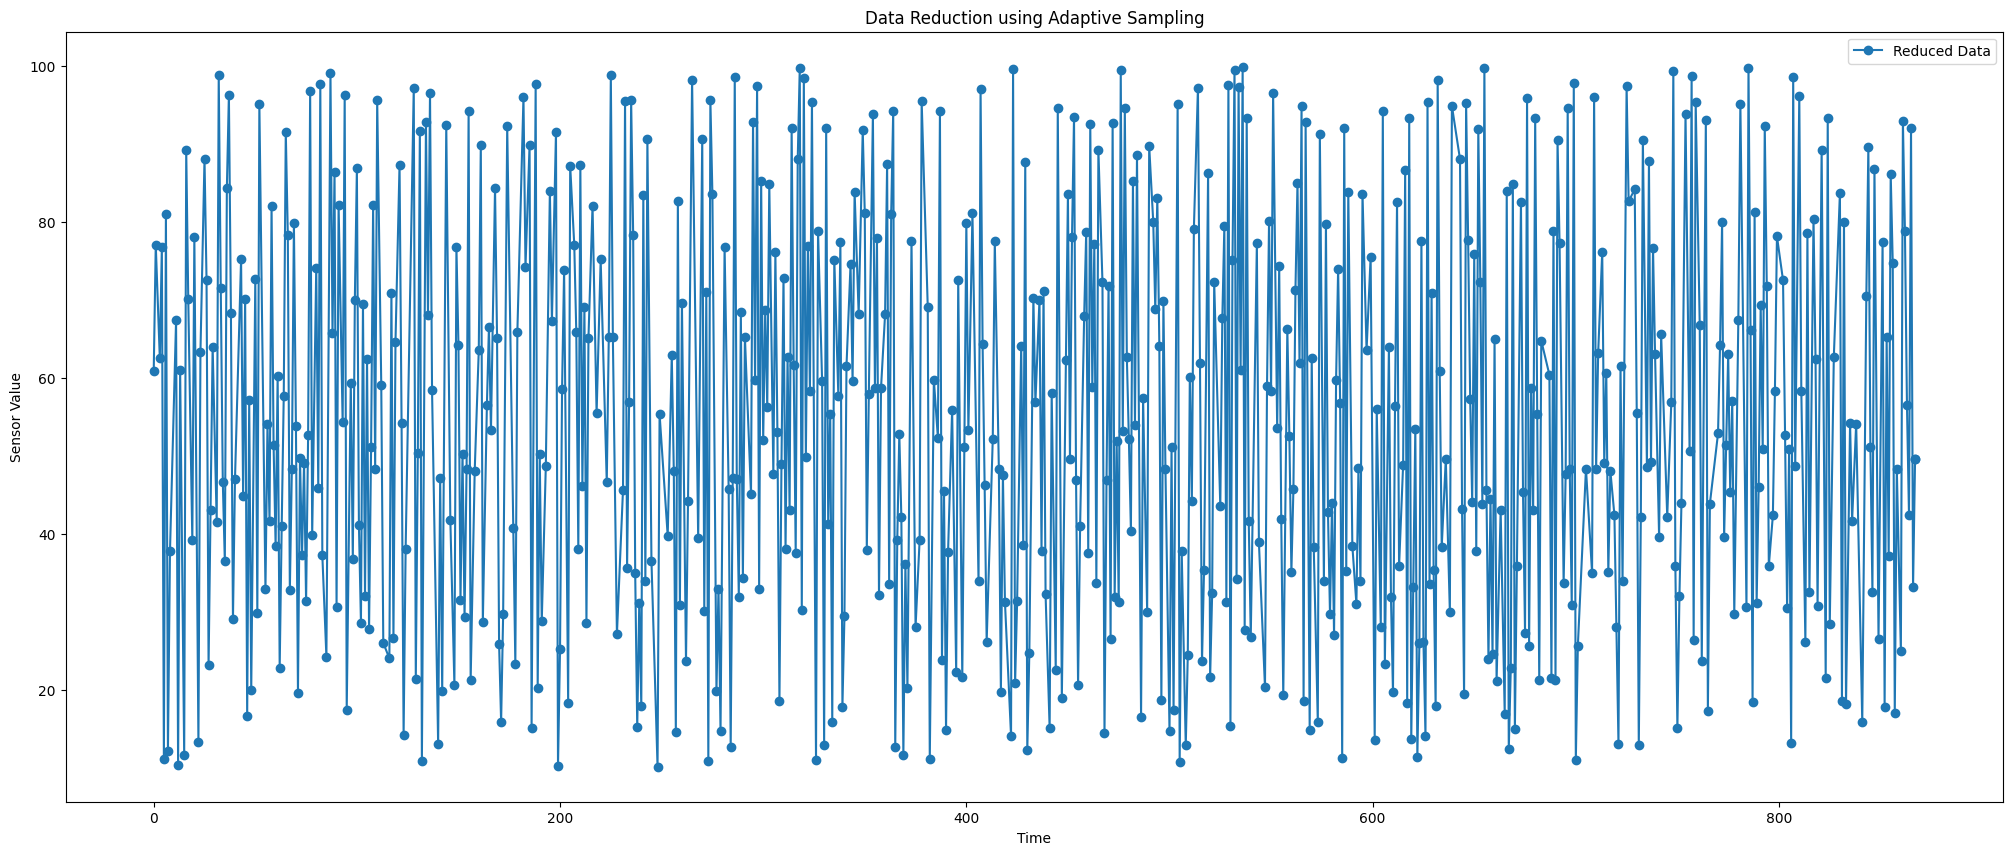

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'simulated_data' contains your cleaned sensor data

# Calculate the absolute difference between consecutive data points
diffs = np.abs(np.diff(simulated_data))

# Set a threshold for significant changes
threshold = 10  # Adjust this threshold based on your data

# Identify indices where the change exceeds the threshold
significant_changes = np.where(diffs > threshold)[0]

# Include the first and last data points, and the significant changes
reduced_indices = np.concatenate(([0], significant_changes + 1, [len(simulated_data) - 1]))

# Extract the reduced data using the selected indices
reduced_data = simulated_data[reduced_indices]
print('Lenght of Reduced Data:', len(reduced_data))
print('Reduction Rate: {:.1f}%'.format((1 - len(reduced_data)/len(simulated_data))*100))

# Plot the original and reduced data
#plt.plot(simulated_data, label='Original Data')
plt.figure(figsize=(25, 10))
plt.plot(reduced_indices, reduced_data, label='Reduced Data', marker='o', linestyle='-')
plt.title('Data Reduction using Adaptive Sampling')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.legend()
plt.show()

Data integration is the process of combining data from multiple sources into a unified view. This is often a crucial step in data preprocessing, especially when dealing with real-world datasets that originate from different databases, files, or APIs. Data integration enables a more comprehensive understanding of the data and facilitates more insightful analysis.

### Key Aspects of Data Integration

* **Data Identification:** The first step involves identifying the relevant data sources that need to be integrated. This requires understanding the nature of the data, its format, and its relevance to the overall analysis.

* **Data Transformation:** Data from different sources often have different formats, schemas, and semantics. Data transformation involves converting the data into a common format and schema so that it can be seamlessly combined. This may include data cleaning, data type conversion, and schema mapping.

* **Data Loading:** Once the data is transformed, it needs to be loaded into a target database or data warehouse. This ensures that the integrated data is accessible for analysis and further processing.

* **Data Validation:** After integration, it's crucial to validate the accuracy and consistency of the combined data. This step involves checking for data integrity, resolving any inconsistencies, and ensuring that the integrated data meets the required quality standards.

In [ ]:
import numpy as np

# Assuming 'simulated_data' contains your numerical data
# and 'land_cover_classes' is defined (e.g., ['bare soil', 'water body', 'developed area'])

# Extend the categorical series to match the length of the simulated data
extended_land_cover = np.random.choice(land_cover_classes, size=len(simulated_data))

# Create a list of paired values
paired_data = list(zip(simulated_data, extended_land_cover))

# Convert the list of pairs to a matrix
integrated_matrix = np.array(paired_data)

# Print the first five rows
print("First five rows:\n", integrated_matrix[:5])

First five rows:
 [['60.89289525504613' 'developed area']
 ['77.10119354527973' 'water body']
 ['82.55863342558281' 'developed area']
 ['62.56378217171231' 'developed area']
 ['76.89376482810667' 'bare soil']]


## Data Integration: Beyond Simple Concatenation

While the previous examples illustrated basic data integration through dataset combinations or matrix creation, real-world data integration scenarios can be far more intricate. Often, data needs to be integrated across multiple dimensions, such as space and time.

### Space and Time Integration

**Space integration** entails combining data originating from various spatial locations or geographical areas. This process might involve merging datasets containing coordinate information, aligning data to a common spatial grid, or employing interpolation techniques to fill gaps in spatial coverage.

**Time integration**, on the other hand, focuses on combining data from different time periods or timestamps. This might necessitate aligning data to a shared timeline, addressing temporal inconsistencies, or using interpolation to bridge gaps in temporal coverage.

### Example: Integrating Spatial and Temporal Data

Consider a hypothetical scenario involving two datasets:

1. **Sensor Data:** A time series of sensor readings recorded at a specific location.
2. **Weather Data:** Hourly weather data encompassing a region, including temperature, humidity, and rainfall measurements.

Our objective is to integrate these datasets to analyze the relationship between sensor readings and prevailing weather conditions. This integration involves both spatial and temporal considerations:

* **Space:** We need to ensure that the sensor's location falls within the spatial coverage provided by the weather data.
* **Time:** We need to synchronize the timestamps of the sensor data with those of the weather data.

In [ ]:
import pandas as pd
import numpy as np

# Define the number of data points
num_points = len(simulated_data)

# Generate random timestamps
timestamps = pd.date_range(start='2023-01-01', periods=num_points, freq='h')

# Generate sensor data
sensor_data = pd.DataFrame({'Timestamp': timestamps, 'SensorValue': simulated_data})

# Generate random latitude and longitude values within a range
latitudes = np.random.uniform(37.7, 37.8, num_points)
longitudes = np.random.uniform(-122.5, -122.3, num_points)

# Force some data points to match sensor's location
sensor_latitude = 37.7749  # Replace with actual sensor latitude
sensor_longitude = -122.4194  # Replace with actual sensor longitude
num_matches = 5 # Number of data points to force-match
match_indices = np.random.choice(num_points, num_matches, replace=False)
latitudes[match_indices] = sensor_latitude
longitudes[match_indices] = sensor_longitude

# Generate random temperature, humidity, and rainfall values
temperatures = np.random.uniform(10, 25, num_points)  # Example temperature range in Celsius
humidity = np.random.uniform(40, 80, num_points)  # Example humidity range in percentage
rainfall = np.random.uniform(0, 5, num_points)  # Example rainfall range in millimeters

# Create the weather_data DataFrame
weather_data = pd.DataFrame({
    'Timestamp': timestamps,
    'Latitude': latitudes,
    'Longitude': longitudes,
    'Temperature': temperatures,
    'Humidity': humidity,
    'Rainfall': rainfall
})

# Filter weather data to the sensor location (assuming sensor coordinates are known)
weather_data_filtered = weather_data[
    (weather_data['Latitude'] == sensor_latitude) & (weather_data['Longitude'] == sensor_longitude)
]

# Merge sensor data and filtered weather data based on timestamp
integrated_data = pd.merge(sensor_data, weather_data_filtered, on='Timestamp', how='inner')

print(integrated_data.head())

            Timestamp  SensorValue  Latitude  Longitude  Temperature  \
0 2023-01-02 15:00:00    29.068715   37.7749  -122.4194    21.232237   
1 2023-01-04 00:00:00    49.731549   37.7749  -122.4194    19.480063   
2 2023-01-12 07:00:00    30.193223   37.7749  -122.4194    19.290531   
3 2023-01-12 13:00:00    19.928581   37.7749  -122.4194    19.275348   
4 2023-01-30 01:00:00    48.416120   37.7749  -122.4194    10.138956   

    Humidity  Rainfall  
0  53.770730  2.401485  
1  40.326300  3.813583  
2  69.515359  1.495748  
3  63.575597  1.755731  
4  74.313308  0.152148  


## Data Validation

Data validation is the process of ensuring that data is accurate, consistent, and meets the required quality standards. It involves applying various checks and rules to identify and handle potential errors, inconsistencies, and invalid data points.

### Why is Data Validation Important?

* **Data Quality:** It ensures the reliability and accuracy of the data used for analysis and decision-making.
* **Error Detection:** It helps identify and correct errors early in the data processing pipeline, preventing them from propagating and affecting downstream analysis.
* **Consistency:** It ensures data consistency across different sources and formats, facilitating data integration and analysis.
* **Data Integrity:** It maintains the integrity of the data by preventing the introduction of invalid or corrupted data.

### Common Data Validation Techniques

* **Data Type Validation:** Checking if data values conform to the expected data types (e.g., numeric, string, date).
* **Range Validation:** Checking if data values fall within a specified range or limits.
* **Format Validation:** Checking if data values adhere to a specific format (e.g., email address, phone number).
* **Consistency Validation:** Checking for consistency between different data elements or across different data sources.
* **Uniqueness Validation:** Checking for duplicate or redundant data entries.

### Sensor Data:
- Range Validation: We can check if the sensor readings fall within the expected range (e.g., 0-100). If any readings are outside this range, they could indicate sensor errors or outliers.
- Consistency Validation: We can check for consistency in the sensor readings over time. If there are sudden or unexpected changes in the readings, it could indicate a sensor malfunction or external interference.

In [ ]:
import pandas as pd

# ... (Previous weather data simulation code) ...

# Data type validation
assert weather_data['Temperature'].dtype == np.float64
assert weather_data['Humidity'].dtype == np.float64
assert weather_data['Rainfall'].dtype == np.float64

# Range validation
weather_data['Temperature'] = np.clip(weather_data['Temperature'], -50, 50)
weather_data['Humidity'] = np.clip(weather_data['Humidity'], 0, 100)
weather_data['Rainfall'] = np.clip(weather_data['Rainfall'], 0, 100)

# ... (Rest of the code) ...

### Weather Data:

- Data Type Validation: We can check if the temperature, humidity, and rainfall values are of the correct data types (e.g., numeric).
- Range Validation: We can check if the weather values fall within realistic ranges (e.g., temperature between -50°C and 50°C).
- Consistency Validation: We can check for consistency between temperature, humidity, and rainfall values. For example, if the temperature is very high, we wouldn't expect the humidity to be very low.

In [ ]:
import numpy as np

# ... (Previous sensor data simulation code) ...

# Range validation
sensor_data['SensorValue'] = np.clip(sensor_data['SensorValue'], 0, 100)

# Consistency validation (example: check for sudden changes)
sudden_changes = np.where(np.abs(np.diff(sensor_data['SensorValue'])) > 30)[0]
if len(sudden_changes) > 0:
  print("Warning: Sudden changes in sensor readings detected at indices:", sudden_changes)



  47  49  50  51  54  57  58  61  64  66  68  70  71  76  77  79  81  82
  86  87  89  90  92  93  94  96  98 100 102 103 104 105 107 108 109 111
 112 116 117 118 121 122 127 128 130 131 133 136 139 140 143 145 148 150
 154 155 161 167 169 173 176 178 185 187 188 189 194 197 198 200 203 204
 209 210 212 213 224 225 227 231 232 234 236 240 241 242 244 248 252 256
 257 258 259 261 264 267 269 270 271 272 273 276 280 283 284 285 286 288
 289 290 294 295 296 297 298 299 304 307 308 310 313 314 316 318 319 320
 323 325 326 329 330 331 333 334 338 340 350 353 354 356 361 362 364 368
 372 374 377 381 383 386 387 389 394 395 397 402 405 406 407 412 422 423
 426 428 429 432 436 437 438 441 444 446 448 450 453 459 460 461 463 464
 467 468 470 471 472 475 476 477 478 481 482 483 485 486 488 489 495 496
 499 500 501 503 504 509 511 514 515 518 519 521 527 528 529 530 532 533
 534 535 536 537 538 542 543 546 547 550 552 554 557 564 565 566 568 569
 573 575 576 577 581 584 585 586 587 589 594 600 60

### Explanation:

1. **Filter Weather Data:** The `weather_data` DataFrame is filtered to select only the rows corresponding to the sensor's location. This ensures that we are only considering weather data relevant to the sensor's spatial context.
2. **Merge Data:** The `pd.merge` function is used to combine the `sensor_data` and the filtered `weather_data` based on the 'Timestamp' column. This aligns the data in time, ensuring that sensor readings and weather conditions are associated with the same timestamps. The `how='inner'` argument ensures that only rows with matching timestamps are included in the integrated data.

This example illustrates a basic space and time integration scenario. Real-world integrations can be much more complex, involving data from multiple sources, different spatial and temporal resolutions, and various data transformation and cleaning steps. However, this example demonstrates the fundamental concepts of integrating data across different dimensions.